In [4]:
#####loading main.py to read all the datasets needed for the application####
# %load main.py

import tkinter as tk
from tkinter.messagebox import showinfo
from tkinter import *
import tkinter
from datetime import datetime
import time
import seaborn as sn
import numpy as np
import pandas as pd
from datetime import date
import dateutil.relativedelta
import matplotlib.pyplot as plt
import glob
import os
#import seaborn as sn
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,mean_squared_error,r2_score, mean_absolute_error
import pandas as pd
from pandas import read_csv
from pandas import set_option
from matplotlib import pyplot
from sklearn.model_selection import train_test_split,cross_val_score,KFold
import main


os.chdir('C:\\university\\second semeaster\\machine learning\\test_ml')
def construct_download_url(
	ticker,
	period1,
	period2,
	interval='monthly'
):
	"""
	:period1 & period2: 'yyyy-mm-dd'
	:interval: {daily; weekly, monthly}
	"""
	def convert_to_seconds(period):
		datetime_value = datetime.strptime(period, '%Y-%m-%d')
		total_seconds = int(time.mktime(datetime_value.timetuple())) + 86400
		return total_seconds
	try:
		interval_reference = {'daily': '1d', 'weekly': '1wk', 'monthly': '1mo'}
		_interval = interval_reference.get(interval)
		if _interval is None:
			print('interval code is incorrect')
			return
		p1 = convert_to_seconds(period1)
		p2 = convert_to_seconds(period2)
		url = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={p1}&period2={p2}&interval={_interval}&filter=history'

		return url
	except Exception as e:
		print(e)
		return



# Getting today's date
today=date.today()

# Getting last 25 years
start=today + dateutil.relativedelta.relativedelta(months=-300)
#start="2022-01-11"
print(start)


####downloading cryptos datasets######
# A list for all Cryptos
name_list=['BTC-GBP','ETH-GBP','USDT-GBP','BNB-GBP','USDC-GBP','XRP-GBP',
			'DOGE-GBP','ADA-GBP','MATIC-GBP','DOT-GBP','DAI-GBP','LTC-GBP',
			'SOL-GBP','TRX-GBP','HEX-GBP','UNI7083-GBP','AVAX-GBP','LINK-GBP'
			,'ATOM-GBP','XMR-GBP','CVNA','GME','RXDX','BYND','SAVA','AMC','MOMO','RENT','TSLA','AI',
			'BILI','MYSZ','EXPR','NUWE','ASML','ATOS','ZIM','CRM','RIG','GSL','AVCT',
			'MULN','BTI','GOCO','MBLY','VRM','MTB','EVGO','LULU','LVS','AAPL']

#a loop through all the cryptos list to getting all the data for each crypto
for i in range(len(name_list)):
    # retrive dataset
	query_url = construct_download_url(str(name_list[i]), str(start), str(today), 'daily')
	df = pd.read_csv(query_url)
	df.set_index('Date', inplace=True)
	#adding a column for cryptos name
	#df.insert(2,column="crypto",value=(str(cryptos_list[i])))
	# save dataset as a CSV
	df.to_csv(str(name_list[i]+'.csv'))

#getting user's choosen ticker or crypto
global file_name
file_name=input("enter your input")
print(file_name)
my_data=read_csv(f"C:\\university\\second semeaster\\machine learning\\ML-final-project\\{file_name}.csv", delimiter=',')



AAPL
1998-01-19
AAPL


In [5]:

my_data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
6287,2023-01-05,127.129997,127.769997,124.760002,125.019997,125.019997,80962700
6288,2023-01-06,126.010002,130.289993,124.889999,129.619995,129.619995,87686600
6289,2023-01-09,130.470001,133.410004,129.889999,130.149994,130.149994,70790800
6290,2023-01-10,130.259995,131.259995,128.119995,130.729996,130.729996,63803400
6291,2023-01-11,131.250000,132.104996,130.460007,131.345001,131.345001,19756486


In [6]:
my_data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1998-01-12,0.155692,0.166295,0.152902,0.162946,0.138898,516398400
1,1998-01-13,0.166295,0.175223,0.165179,0.174107,0.148412,636854400
2,1998-01-14,0.177455,0.178013,0.171875,0.176339,0.150314,589265600
3,1998-01-15,0.171317,0.176339,0.166295,0.171317,0.146034,559272000
4,1998-01-16,0.173549,0.173549,0.166853,0.167969,0.143180,246355200


In [7]:
print(my_data.shape)

(6292, 7)


In [8]:
print(my_data.index)

RangeIndex(start=0, stop=6292, step=1)


In [9]:
print("Data types are:")
print(my_data.dtypes)

Data types are:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [10]:
#to working with time series data in pandas is needded to change the type to datetime64 and numeric aftre that
#my_data['Date']=pd.to_numeric(pd.to_datetime(my_data['Date']))
my_data['Date']=pd.to_datetime(my_data['Date'])

print(my_data.dtypes)

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


In [11]:
print("Data describe in csv fil:")
print(my_data.describe())

Data describe in csv fil:
              Open         High          Low        Close    Adj Close  \
count  6292.000000  6292.000000  6292.000000  6292.000000  6292.000000   
mean     27.714973    28.028956    27.402285    27.726108    26.631210   
std      42.275386    42.792923    41.767627    42.297543    42.114894   
min       0.155692     0.165179     0.152902     0.157924     0.134617   
25%       0.923270     0.943917     0.893276     0.919364     0.783682   
50%       9.238036     9.300536     9.121607     9.238392     7.874970   
75%      31.578125    31.806250    31.341876    31.595001    28.585936   
max     182.630005   182.940002   179.119995   182.009995   180.959732   

             Volume  
count  6.292000e+03  
mean   4.203418e+08  
std    3.851957e+08  
min    1.975649e+07  
25%    1.504462e+08  
50%    3.076920e+08  
75%    5.584747e+08  
max    7.421641e+09  


In [12]:
#adding tomorrow column to the datasets
#Tomorrow is includes the day after close prive
my_data["Tomorrow"]=my_data["Close"].shift(-1)
#Adding another column for Tagrget. if tomorrow's price is higher than close price then it set 1 in the target
my_data["Target"]=(my_data["Tomorrow"]>my_data["Close"]).astype(int)
my_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
0,1998-01-12,0.155692,0.166295,0.152902,0.162946,0.138898,516398400,0.174107,1
1,1998-01-13,0.166295,0.175223,0.165179,0.174107,0.148412,636854400,0.176339,1
2,1998-01-14,0.177455,0.178013,0.171875,0.176339,0.150314,589265600,0.171317,0
3,1998-01-15,0.171317,0.176339,0.166295,0.171317,0.146034,559272000,0.167969,0
4,1998-01-16,0.173549,0.173549,0.166853,0.167969,0.143180,246355200,0.170201,1
5,1998-01-20,0.170201,0.172433,0.166295,0.170201,0.145082,241561600,0.168806,0
6,1998-01-21,0.167411,0.170201,0.165737,0.168806,0.143893,190209600,0.171875,1
7,1998-01-22,0.166853,0.176339,0.166295,0.171875,0.146509,329728000,0.174107,1
8,1998-01-23,0.172991,0.175781,0.171875,0.174107,0.148412,233161600,0.173549,0
9,1998-01-26,0.173549,0.174665,0.167969,0.173549,0.147936,146440000,0.170759,0


In [13]:
#Finding missing data

#printing rows containing empty variables
my_empty_data=my_data[my_data.isna().any(axis=1)]
print("#####Missing data #######")
print(my_empty_data)

my_data=my_data.dropna()




#####Missing data #######
           Date    Open        High         Low       Close   Adj Close  \
6291 2023-01-11  131.25  132.104996  130.460007  131.345001  131.345001   

        Volume  Tomorrow  Target  
6291  19756486       NaN       0  


In [14]:
#recheck the missing values

#printing rows containing empty variables
my_empty_data=my_data[my_data.isna().any(axis=1)]
print("#####Missing data #######")
print(my_empty_data)


#####Missing data #######
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Tomorrow, Target]
Index: []


In [15]:
#Finding dublicated rows

print(my_data.duplicated().sum())

0


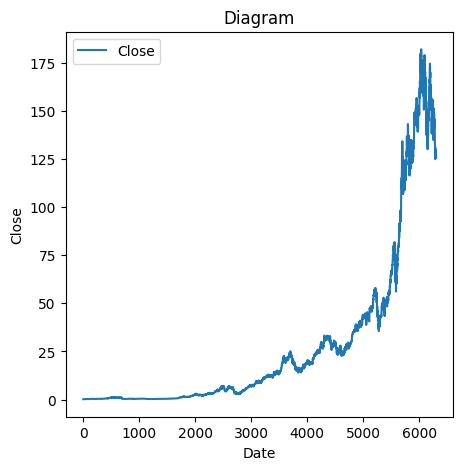

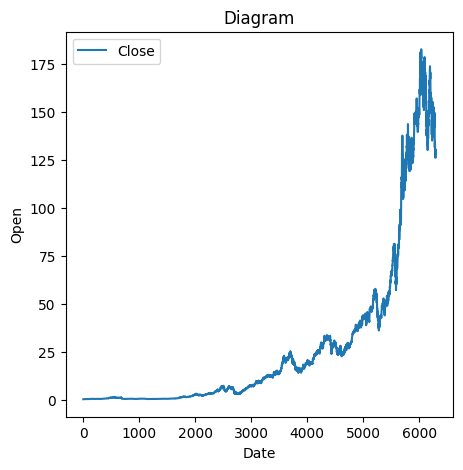

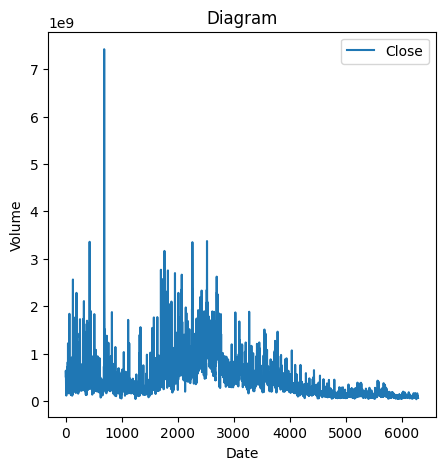

In [16]:
#draw a graph function
def draw_diagram(data,column):
	plt.figure(figsize=(5,5))
	plt.title('Diagram')
	plt.xlabel('Date')
	plt.ylabel(f'{column}')
	plt.plot(data[f'{column}'])
	plt.legend(['Close'])
	plt.savefig('images/grapg.png')

draw_diagram(my_data,'Close')
draw_diagram(my_data,'Open')
draw_diagram(my_data,'Volume')





<AxesSubplot: >

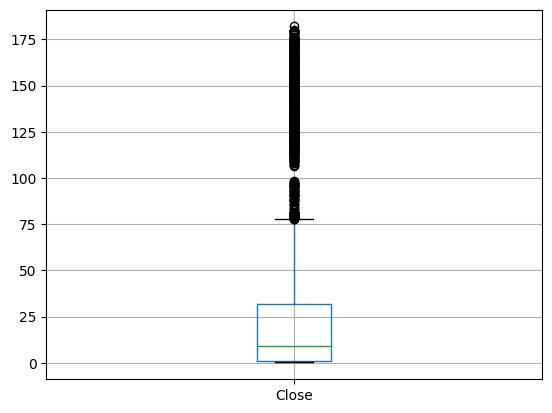

In [17]:
#boxplot for to find outliers
my_data.boxplot(column=["Close"])

In [18]:
print("Median :")
print(my_data.median())


Median :
Open         9.233214e+00
High         9.299286e+00
Low          9.118214e+00
Close        9.238214e+00
Adj Close    7.874819e+00
Volume       3.077592e+08
Tomorrow     9.238571e+00
Target       1.000000e+00
dtype: float64


C:\Users\nastaran\AppData\Local\Temp\ipykernel_7588\2832021239.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(my_data.median())


In [19]:
#getting max  for each cruptos

my_data['Close'].max()

182.009995

In [20]:
#getting min  for each cruptos

my_data['Close'].min()

0.157924

C:\Users\nastaran\AppData\Local\Temp\ipykernel_7588\687959902.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix=my_data.corr(method='pearson')


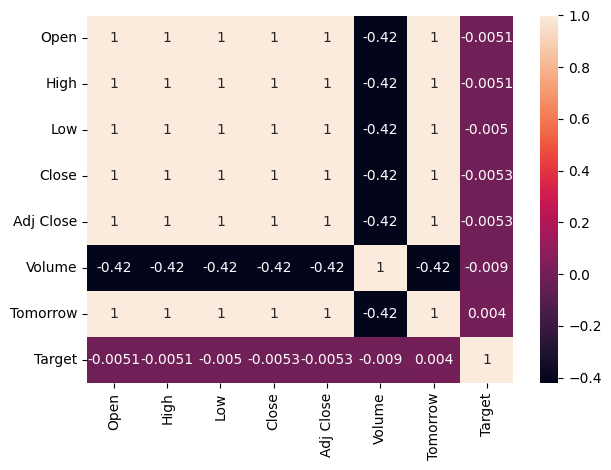

In [21]:
#Create a Correlation Matrix using Pandas for cryptos
corrMatrix=my_data.corr(method='pearson')
sn.heatmap(corrMatrix, annot=True)
plt.rcParams["figure.figsize"] = [13,13]
plt.rcParams["figure.autolayout"] = True
plt.savefig('images/cor.png')
plt.show()
#As it  is vissible there is not any linear correlation

In [22]:
correMatrix_tom=my_data.corr()[['Tomorrow']]
correMatrix_tom.style.background_gradient(cmap='YlOrRd').set_precision(2)
#between Tomorrow and close there is strongly possitive relationship


C:\Users\nastaran\AppData\Local\Temp\ipykernel_7588\3020489423.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correMatrix_tom=my_data.corr()[['Tomorrow']]
C:\Users\nastaran\AppData\Local\Temp\ipykernel_7588\3020489423.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correMatrix_tom.style.background_gradient(cmap='YlOrRd').set_precision(2)


,Tomorrow
Open,1.00
High,1.00
Low,1.00
Close,1.00
Adj Close,1.00
Volume,-0.42
Tomorrow,1.00
Target,0.00


In [23]:
#checking for skewness in cryptos data
print(my_data.skew())


Open         2.057840
High         2.059912
Low          2.055306
Close        2.057608
Adj Close    2.104912
Volume       2.952539
Tomorrow     2.055775
Target      -0.083705
dtype: float64


C:\Users\nastaran\AppData\Local\Temp\ipykernel_7588\305722313.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(my_data.skew())


In [24]:
#*************The first approach:The first approach:*****************

"""
#n_estimator is the number of individual decision trees more up is better
#min_samplea_split is helping to not being overfit
model=RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)
#all data except the last 100
predictors=["Close","Volume","Open","High","Low"]

#spiliting train and test
#all data except the last 100 rows
train=my_data.iloc[:-100]
#the last 100 rows
test=my_data.iloc[-100:]
#print(train)
#print(test)

X_train=train[predictors]
y_train=train["Target"]
X_test=test[predictors]
y_test=test["Target"]
model.fit(X_train,y_train)
#now let's predict the model
y_pred_train=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred=pd.Series(y_pred, index=test.index)
ps=precision_score(y_test,y_pred)
print("precision score: {:.2f}".format((ps)))

#mae=mean_absolute_error(y_test,y_pred)
#mse=mean_absolute_error(y_test,y_pred)
#rmse=np.sqrt(mse)
#r2_test=r2_score(y_test,y_pred)

#the R2 for the train dataset
#r2_train=r2_score(y_train,y_pred_train)

#print("Mean Absolute error: {:.2f}".format((mae)))
#print("Mean Squared error: {:.2f}".format((mse)))
#print(" Root Mean Squared error: {:.2f}".format((rmse)))
#print("R2 score Test data:{:.2f}".format(r2_test))
#print("R2 score Train data:{:.2f}".format(r2_train))



combined=pd.concat([test["Target"],y_pred],axis=1)
combined.plot()
"""

'\n#n_estimator is the number of individual decision trees more up is better\n#min_samplea_split is helping to not being overfit\nmodel=RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)\n#all data except the last 100\npredictors=["Close","Volume","Open","High","Low"]\n\n#spiliting train and test\n#all data except the last 100 rows\ntrain=my_data.iloc[:-100]\n#the last 100 rows\ntest=my_data.iloc[-100:]\n#print(train)\n#print(test)\n\nX_train=train[predictors]\ny_train=train["Target"]\nX_test=test[predictors]\ny_test=test["Target"]\nmodel.fit(X_train,y_train)\n#now let\'s predict the model\ny_pred_train=model.predict(X_train)\ny_pred=model.predict(X_test)\ny_pred=pd.Series(y_pred, index=test.index)\nps=precision_score(y_test,y_pred)\nprint("precision score: {:.2f}".format((ps)))\n\n#mae=mean_absolute_error(y_test,y_pred)\n#mse=mean_absolute_error(y_test,y_pred)\n#rmse=np.sqrt(mse)\n#r2_test=r2_score(y_test,y_pred)\n\n#the R2 for the train dataset\n#r2_train=r

In [25]:
#*************The second approach****************************
""""
model=RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)

#this function predict the result
predictors=["Close","Volume","Open","High","Low"]
def predict(train,test,predictors,model):
		model.fit(train[predictors],train["Target"])
		#now let's predict the model
		preds=model.predict(test[predictors])
		preds=pd.Series(preds, index=test.index,name="predictions")
		combined=pd.concat([test["Target"],preds],axis=1)
		return combined
#2500 mean 10 years as each trading year is 250 days
#it train the model with 10 years data
#it trains the model yearly(step=250)
def backtest(data,model, predictors, start=2500,step=250):
	al_predictions=[]
	#loop through each year's data
	for i in range(start,data.shape[0],step):
		#till current year
		train=data.iloc[0:i].copy()
		#current year plus one year
		#for example 10 it gets 10 years data and then predict model for the next 11 years
		test=data.iloc[i:(i+step)].copy()
		predictions=predict(train,test,predictors,model)
		al_predictions.append(predictions)
	return pd.concat(al_predictions)





predictions=backtest(my_data,model,predictors)
predictions["predictions"].value_counts()

precision_score(predictions["Target"],predictions["predictions"])

"""

'"\nmodel=RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)\n\n#this function predict the result\npredictors=["Close","Volume","Open","High","Low"]\ndef predict(train,test,predictors,model):\n\t\tmodel.fit(train[predictors],train["Target"])\n\t\t#now let\'s predict the model\n\t\tpreds=model.predict(test[predictors])\n\t\tpreds=pd.Series(preds, index=test.index,name="predictions")\n\t\tcombined=pd.concat([test["Target"],preds],axis=1)\n\t\treturn combined\n#2500 mean 10 years as each trading year is 250 days\n#it train the model with 10 years data\n#it trains the model yearly(step=250)\ndef backtest(data,model, predictors, start=2500,step=250):\n\tal_predictions=[]\n\t#loop through each year\'s data\n\tfor i in range(start,data.shape[0],step):\n\t\t#till current year\n\t\ttrain=data.iloc[0:i].copy()\n\t\t#current year plus one year\n\t\t#for example 10 it gets 10 years data and then predict model for the next 11 years\n\t\ttest=data.iloc[i:(i+step)].copy()\n

In [26]:
#Tunning the model using grid search
"""
#Grid Search hyperparameter tuning
from sklearn.model_selection import GridSearchCV


predictors=["Close","Volume","Open","High","Low"]

#spiliting train and test
#all data except the last 100 rows
train=my_data.iloc[:-100]
#the last 100 rows
test=my_data.iloc[-100:]
#print(train)
#print(test)

X_train=train[predictors]
y_train=train["Target"]
X_test=test[predictors]
y_test=test["Target"]

#now we can instantiate the model for our model
#in this case the decision tree model is used
my_model=RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)
#print the model default hyperparameters
print('\n Hyperparameters of Default model \n', my_model.get_params(),'\n')

#create a cross validation split
kfolds_split=KFold(n_splits=10)

#declare a dictionary of hyperparameter and values
classifier_hypara=dict()
classifier_hypara['max_depth']=[2,3,4,8,10]
classifier_hypara['min_samples_split']=[2,4,6,8,9]
classifier_hypara['n_estimators']=[10,20,50,100,110]
classifier_hypara['criterion']=['gini','entropy']

X=my_data[predictors]
y=my_data["Target"]
#perform a gridsearch and fit the grid
classifier_grid=GridSearchCV(my_model,classifier_hypara, scoring='accuracy', n_jobs=-1, cv=kfolds_split)
classifier_grid_fit=classifier_grid.fit(X,y)

#compute the array containing the 10 folds and calculate the cros validation mean score
CV_scores=-cross_val_score(classifier_grid_fit,X_train, y_train, cv=kfolds_split)
print("\nCross Val mean: {:.3f} (std: {:.3f})".format(CV_scores.mean()*-1,CV_scores.std()),end="\n\n" )

#we cab print teh hyperparameter tuning results
print('Best Hyperparameters: %s' %classifier_grid_fit.best_params_)
print('Best max_depth=', classifier_grid_fit.best_estimator_.get_params()['max_depth'])
print('Best min_samples_aplit =', classifier_grid_fit.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf =', classifier_grid_fit.best_estimator_.get_params()['min_samples_leaf'])
print('Best criterion', classifier_grid_fit.best_estimator_.get_params()['criterion'])


#print best hyperparameteres
print('\n Suggested Best Hyperparameters: \n', classifier_grid_fit.best_estimator_.get_params())
print('best score: %s {:.3f}\n'.format(classifier_grid_fit.best_score_))

#now we use sugessted hyperparametes
my_model= DecisionTreeClassifier(max_depth=8, min_samples_leaf=1, random_state=1, criterion='gini',min_samples_split=2)
#train teh model to fit
my_model.fit(X_train,y_train)

#declare the num of folds
num_folds=KFold(n_splits=10, random_state=1,shuffle=True)
#test by changing n_splits to 3, 5 and 10
#compute the array containing the 10 folds and calculate the cros validation mean score
CV_scores=-cross_val_score(my_model,X_train, y_train, cv=num_folds)
print("\nCross Val mean: {:.3f} (std: {:.3f})".format(CV_scores.mean()*-1,CV_scores.std()),end="\n\n" )




#now let's predict the model
y_pred_train=my_model.predict(X_train)
#print(y_pred_train)
y_pred=my_model.predict(X_test)
#print(y_pred)


#compute train set accuracy
model_accuracy_train=accuracy_score(y_train,y_pred_train)
print("Model accuracy on Train data:{:.2f}".format(model_accuracy_train), '\n')

#compute test set accuracy
model_accuracy_test=accuracy_score(y_test,y_pred)
print("Model accuracy on Test data:{:.2f}".format(model_accuracy_test), '\n')

#constructing confusion matrix:
matrix_info=confusion_matrix(y_test,y_pred)
print("The Confusion Matrix: \n", matrix_info,'\n')

#Construct the classification report
class_report=classification_report(y_test,y_pred)
print("Report of classification:\n",class_report)
"""


'\n#Grid Search hyperparameter tuning\nfrom sklearn.model_selection import GridSearchCV\n\n\npredictors=["Close","Volume","Open","High","Low"]\n\n#spiliting train and test\n#all data except the last 100 rows\ntrain=my_data.iloc[:-100]\n#the last 100 rows\ntest=my_data.iloc[-100:]\n#print(train)\n#print(test)\n\nX_train=train[predictors]\ny_train=train["Target"]\nX_test=test[predictors]\ny_test=test["Target"]\n\n#now we can instantiate the model for our model\n#in this case the decision tree model is used\nmy_model=RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)\n#print the model default hyperparameters\nprint(\'\n Hyperparameters of Default model \n\', my_model.get_params(),\'\n\')\n\n#create a cross validation split\nkfolds_split=KFold(n_splits=10)\n\n#declare a dictionary of hyperparameter and values\nclassifier_hypara=dict()\nclassifier_hypara[\'max_depth\']=[2,3,4,8,10]\nclassifier_hypara[\'min_samples_split\']=[2,4,6,8,9]\nclassifier_hypara[\'n_estima

In [27]:
"""
import pandas as pd
model=RandomForestClassifier(n_estimators=200,min_samples_split=50,random_state=1)
predictors=["Close","Volume","Open","High","Low"]
def predict(train,test,predictors,model):
		model.fit(train[predictors],train["Target"])
		#now let's predict the model
		#using propability of price going up
		preds=model.predict_proba(test[predictors])[:,1]
		#if it is more than 0.6
		preds[preds>=0.6]=1
		preds[preds<0.6]=0
		preds=pd.Series(preds, index=test.index,name="predictions")
		combined=pd.concat([test["Target"],preds],axis=1)
		return combined


#This time we will look at the priceses for the last 2 days, last 5 days(one week), last 250 days and the last 1000 days(4years)
#we need this to know that for example do today's proce is higher than 2 days ago's proce or last 4 years' price
hor=[2,5,250,1000]
new_pred=[]
for h in hor:
	#calculating avarage for each horizon
	rolling_avr=my_data.rolling(h).mean()
	#adding ratio column
	ratio_column=f"close_ratio_{h}"
	#adding the value of ratio
	my_data[ratio_column]=my_data["Close"]/rolling_avr["Close"]
	#adding another column for trend
	#This shows the numver of column that in the last x days price went up
	trend_column=f"Trend_{h}"
	#it looked at a few days ago and returns sum of target
	my_data[trend_column]=my_data.shift(1).rolling(h).sum()["Target"]
	new_pred+=[ratio_column,trend_column]

my_data=my_data.dropna()


predictions=backtest(my_data,model,new_pred)
predictions["predictions"].value_counts()

precision_score(predictions["Target"],predictions["predictions"])
print(my_data.tail(10))
today_price=my_data["Tomorrow"].iloc[-2]
tommorows_price=my_data["Tomorrow"].iloc[-1]
flag=my_data["Target"].iloc[-1]
print("Today's date",today)
print("Tomorrow's price",tommorows_price)
if (flag==1):
	print(f"The Price for {file_name} will go up")
elif (flag==0):
	if (tommorows_price<today_price):
	    print(f"The price for {file_name} will be decresed")
	else:
		print(f"The price for {file_name} will be same as today")

"""

'\nimport pandas as pd\nmodel=RandomForestClassifier(n_estimators=200,min_samples_split=50,random_state=1)\npredictors=["Close","Volume","Open","High","Low"]\ndef predict(train,test,predictors,model):\n\t\tmodel.fit(train[predictors],train["Target"])\n\t\t#now let\'s predict the model\n\t\t#using propability of price going up\n\t\tpreds=model.predict_proba(test[predictors])[:,1]\n\t\t#if it is more than 0.6\n\t\tpreds[preds>=0.6]=1\n\t\tpreds[preds<0.6]=0\n\t\tpreds=pd.Series(preds, index=test.index,name="predictions")\n\t\tcombined=pd.concat([test["Target"],preds],axis=1)\n\t\treturn combined\n\n\n#This time we will look at the priceses for the last 2 days, last 5 days(one week), last 250 days and the last 1000 days(4years)\n#we need this to know that for example do today\'s proce is higher than 2 days ago\'s proce or last 4 years\' price\nhor=[2,5,250,1000]\nnew_pred=[]\nfor h in hor:\n\t#calculating avarage for each horizon\n\trolling_avr=my_data.rolling(h).mean()\n\t#adding ratio c

In [28]:
#The third approach ##################################
import pandas as pd
predictors=["Close","Volume","Open","High","Low"]

#spiliting train and test
#all data except the last 100 rows
#100 working better than 150 and 200 and 300
train=my_data.iloc[:-200]
#the last 100 rows
test=my_data.iloc[-200:]
#print(train)
#print(test)
X_train=train[predictors]
y_train=train["Target"]
X_test=test[predictors]
y_test=test["Target"]
#min_sample_split = 40 is working better than 50
#n_estimatots=200 is working bettre than 150 and 250
model=RandomForestClassifier(n_estimators=250,min_samples_split=50,max_depth=5,random_state=1)
predictors=["Close","Volume","Open","High","Low"]
def predict(train,test,predictors,model):
		model.fit(train[predictors],train["Target"])
		#now let's predict the model
		#using propability of price going up
		preds=model.predict_proba(test[predictors])[:,1]
		#if it is more than 0.6
		preds[preds>=0.6]=1
		preds[preds<0.6]=0
		preds=pd.Series(preds, index=test.index,name="predictions")
		combined=pd.concat([test["Target"],preds],axis=1)
		return combined

def backtest(data,model, predictors, start=2500,step=250):
	al_predictions=[]
	#loop through each year's data
	for i in range(start,data.shape[0],step):
		#till current year
		train=data.iloc[0:i].copy()
		#current year plus one year
		#for example 10 it gets 10 years data and then predict model for the next 11 years
		test=data.iloc[i:(i+step)].copy()
		predictions=predict(train,test,predictors,model)
		al_predictions.append(predictions)
	return pd.concat(al_predictions)



#This time we will look at the priceses for the last 2 days, last 5 days(one week), last 250 days and the last 1000 days(4years)
#we need this to know that for example do today's proce is higher than 2 days ago's proce or last 4 years' price
hor=[2,5,250,1000]
new_pred=[]
for h in hor:
	#calculating avarage for each horizon
	rolling_avr=my_data.rolling(h).mean()
	#adding ratio column
	ratio_column=f"close_ratio_{h}"
	#adding the value of ratio
	my_data[ratio_column]=my_data["Close"]/rolling_avr["Close"]
	#adding another column for trend
	#This shows the numver of column that in the last x days price went up
	trend_column=f"Trend_{h}"
	#it looked at a few days ago and returns sum of target
	my_data[trend_column]=my_data.shift(1).rolling(h).sum()["Target"]
	new_pred+=[ratio_column,trend_column]

my_data=my_data.dropna()

###'#acuracy#####################################
predictions=backtest(my_data,model,new_pred)
predictions["predictions"].value_counts()
print("The accutacy of test:", precision_score(predictions["Target"],predictions["predictions"]))



###prediction#######
print(my_data.tail(10))
today_price=my_data["Tomorrow"].iloc[-2]
tommorows_price=my_data["Tomorrow"].iloc[-1]
flag=my_data["Target"].iloc[-1]
print("Today's date",today)
print("Tomorrow's price",tommorows_price)
if (flag==1):
	print(f"The Price for {file_name} will go up")
elif (flag==0):
	if (tommorows_price<today_price):
	    print(f"The price for {file_name} will be decresed")
	else:
		print(f"The price for {file_name} will be same as today")


C:\Users\nastaran\AppData\Local\Temp\ipykernel_7588\3108392789.py:54: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  rolling_avr=my_data.rolling(h).mean()
C:\Users\nastaran\AppData\Local\Temp\ipykernel_7588\3108392789.py:63: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  my_data[trend_column]=my_data.shift(1).rolling(h).sum()["Target"]
C:\Users\nastaran\AppData\Local\Temp\ipykernel_7588\3108392789.py:54: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Ind

The accutacy of test: 0.6428571428571429
           Date        Open        High         Low       Close   Adj Close  \
6281 2022-12-27  131.380005  131.410004  128.720001  130.029999  130.029999   
6282 2022-12-28  129.669998  131.029999  125.870003  126.040001  126.040001   
6283 2022-12-29  127.989998  130.479996  127.730003  129.610001  129.610001   
6284 2022-12-30  128.410004  129.949997  127.430000  129.929993  129.929993   
6285 2023-01-03  130.279999  130.899994  124.169998  125.070000  125.070000   
6286 2023-01-04  126.889999  128.660004  125.080002  126.360001  126.360001   
6287 2023-01-05  127.129997  127.769997  124.760002  125.019997  125.019997   
6288 2023-01-06  126.010002  130.289993  124.889999  129.619995  129.619995   
6289 2023-01-09  130.470001  133.410004  129.889999  130.149994  130.149994   
6290 2023-01-10  130.259995  131.259995  128.119995  130.729996  130.729996   

         Volume    Tomorrow  Target  close_ratio_2  Trend_2  close_ratio_5  \
6281   6900